# Descriptive Analysis on Customer Cluster Types

Prepared for KJ Marketing supermarket chain.

Based on analysis and predictions performed in `model_building.ipynb`

Prepared by team `Last Brain Cell` | `Datastorm537`:
- Navindu De Silva
- Saeedha Nazar
- Tishan Rathnasekara

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # visualization package
import seaborn as sns

import category_encoders as ce

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

In [2]:
complete_df = pd.read_csv('data/complete_dataset.csv')

## Number of Customers per Cluster Category

Text(0, 0.5, 'Customer Count')

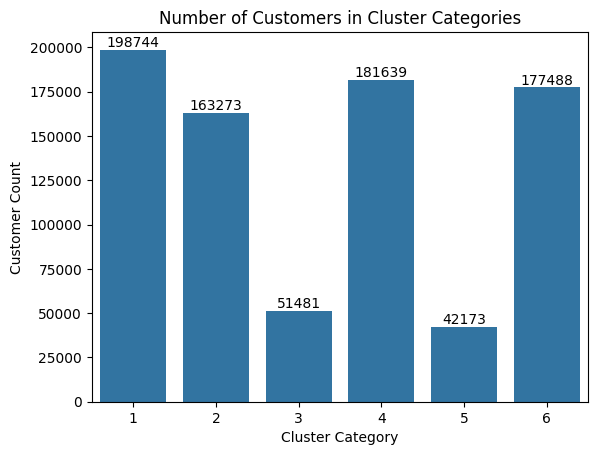

In [ ]:
ax = sns.barplot(pd.DataFrame(complete_df.cluster_category.value_counts().sort_index()).reset_index(), x='index',y='cluster_category', color='#1f77b4')
plt.title("Number of Customers in Cluster Categories")
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Cluster Category')
plt.ylabel('Customer Count')

We can see that clusters `3` and `5` have very low number of customers allocated. Could imply these two clusters have very specific and rare features

## Analysis based on Outlet City

In [46]:
print('Breakdown of Number of Records per outlet store')
pd.DataFrame(complete_df.outlet_city.value_counts()).reset_index().rename(columns={'outlet_city':'count','index':'outlet_city'})

Breakdown of Number of Records per outlet store


,outlet_city,count
0,Batticaloa,43128
1,Colombo,43115
2,Kalmunai,42941
3,Jaffna,42899
4,Negombo,42825
5,Katunayake,42799
6,Kandy,42631
7,Trincomalee,42598
8,Gampaha,42440
9,Galle,41460


Nearly all cities have customers ranging from 37,000 to 44,000.

But outlet cities `Anuradhapura` and `Madawachiya` are very low and only found in the test dataset

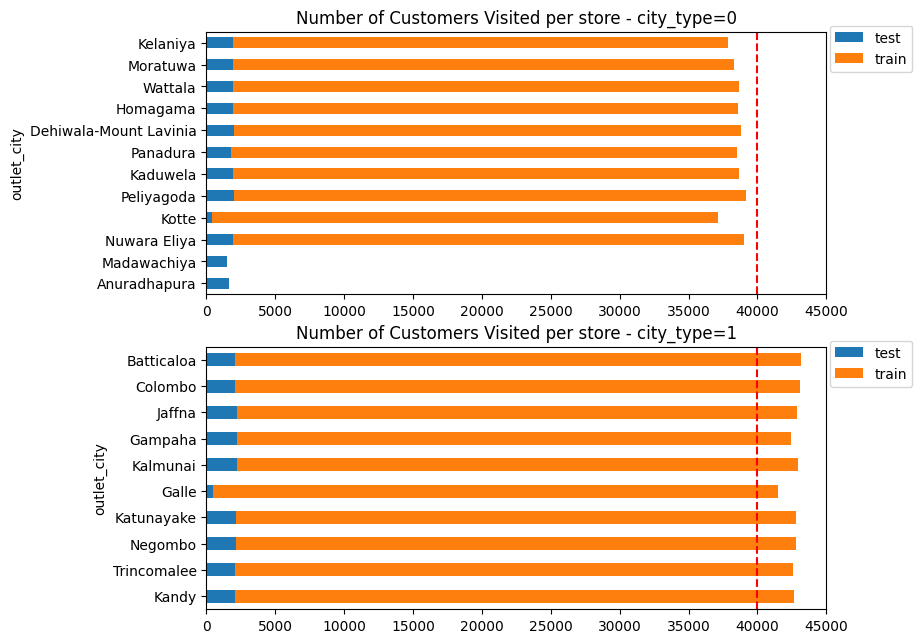

In [47]:
plt.figure(figsize=(8,7.5))
ax = plt.subplot(2,1,1)
complete_df.groupby(['outlet_city','dataset']).Customer_ID.count().unstack(fill_value=0).loc[list(complete_df['outlet_city'].unique())[-2:] + list(complete_df['outlet_city'].unique())[:10][::-1]].plot(kind='barh', stacked=True, ax=ax)
# complete_df.groupby(['outlet_city','dataset']).Customer_ID.count().unstack(fill_value=0).plot(kind='bar', stacked=True)
plt.axvline(x=40000, color='r', linestyle='--')
plt.xlim(0, 45000)
ax.legend(bbox_to_anchor=(1.15, 1.05))

plt.title('Number of Customers Visited per store - city_type=0')
ax = plt.subplot(2,1,2)
complete_df.groupby(['outlet_city','dataset']).Customer_ID.count().unstack(fill_value=0).loc[list(complete_df['outlet_city'].unique())[10:-2][::-1]].plot(kind='barh', stacked=True, ax=ax)
# complete_df.groupby(['outlet_city','dataset']).Customer_ID.count().unstack(fill_value=0).plot(kind='bar', stacked=True)
plt.axvline(x=40000, color='r', linestyle='--')
plt.title('Number of Customers Visited per store - city_type=1')
plt.xlim(0, 45000)
ax.legend(bbox_to_anchor=(1.15, 1.05))

As the above chart shows, outlet cities in `city_type=0` category have less than 40,000 customers while those in `city_type=1` have more than 40,000 customers present.

Note that outlets `Anuradhapura` and `Madawachiya` which are only present in the test dataset are allocated to `city_type=0` due to this breakdown.

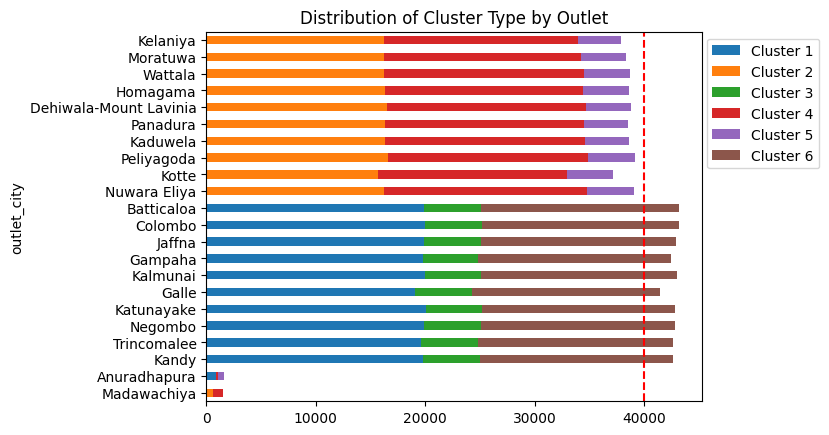

In [76]:
ax = complete_df.groupby(['outlet_city','cluster_category'])['Customer_ID'].count().unstack(fill_value=0).loc[list(complete_df.outlet_city.unique())[::-1]].plot(kind='barh', stacked=True)
ax.set_title('Distribution of Cluster Type by Outlet')
ax.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'], bbox_to_anchor=(1.25, 1))
plt.axvline(x=40000, color='r', linestyle='--')

This plot displays how the cluster types have been allocated to each outlet city. 
- Notably outlets in the `city_type=0` category seem to be only contain customer profiles from Clusters `2`, `4` and `5`
- While outlets in `city_type=1` category seem to be only contain customers from Clusters `1`, `3` and `6`

But note that even though we have allocated outlets `Anuradhapura` and `Madawachiya` into `city_type=0` their predicted clusters are abnormal due to lack of training data to study these two outlets

## Analysis based on Sales

### Using Direct Sales Values for each category 

Text(0.5, 1.0, 'Distribution of Fresh Sales by Customer Clusters')

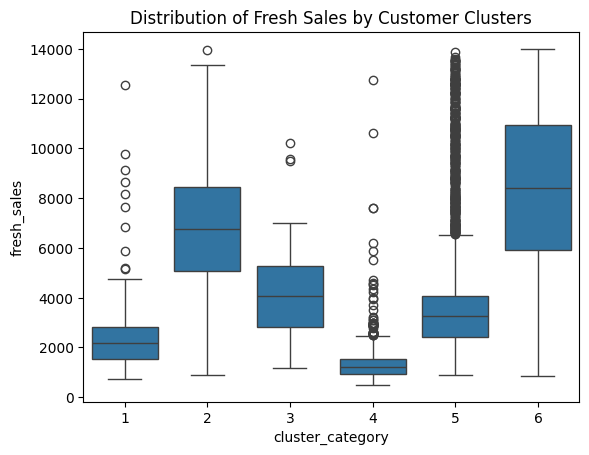

In [16]:
sns.boxplot(complete_df, x='cluster_category', y='fresh_sales',color='#1f77b4')
plt.title("Distribution of Fresh Sales by Customer Clusters")

When it comes to Fresh Sales, Clusters `2` and `6` stand out as buyers who prefer fresh items more than other customers

Text(0.5, 1.0, 'Distribution of Dry Sales by Customer Clusters')

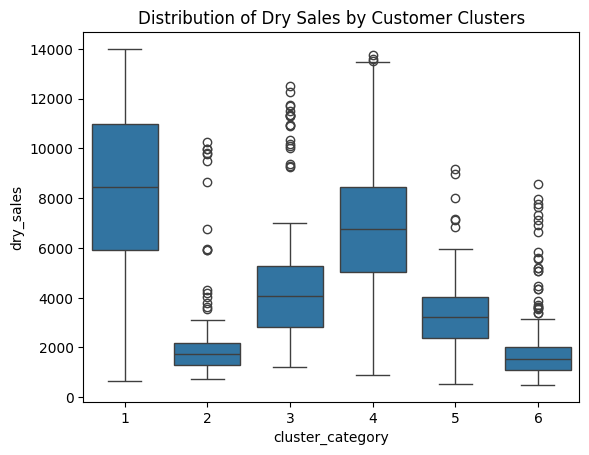

In [17]:
sns.boxplot(complete_df, x='cluster_category', y='dry_sales',color='#1f77b4')
plt.title("Distribution of Dry Sales by Customer Clusters")

Clusters `1` and `4` are more likely to buy Dry Items compared to other customer clusters.

Text(0.5, 1.0, 'Distribution of Luxury Sales by Customer Clusters')

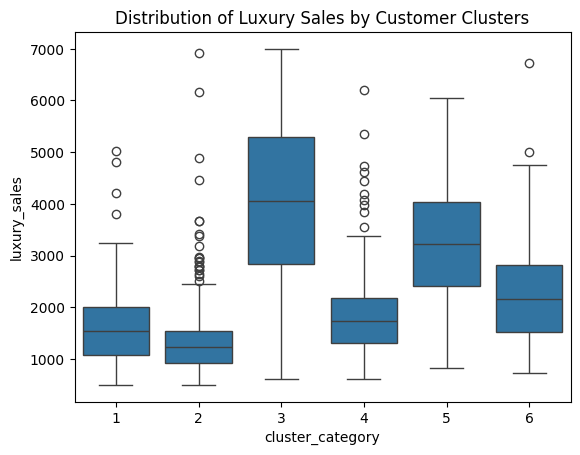

In [18]:
sns.boxplot(complete_df, x='cluster_category', y='luxury_sales',color='#1f77b4')
plt.title("Distribution of Luxury Sales by Customer Clusters")

Clusters `3` and `5` (which were deemed as smaller clusters in size) have high preference to Luxurious items. The low number of customers in these two clusters could be attributed to the less number of people who are able to afford luxurious items

### Using Ratio of Sales in each category

We displayed the variation of the ratio of sales categories per cluster category.

Text(0.5, 1.0, 'Distribution of Luxury/Dry Ratio by Customer Clusters')

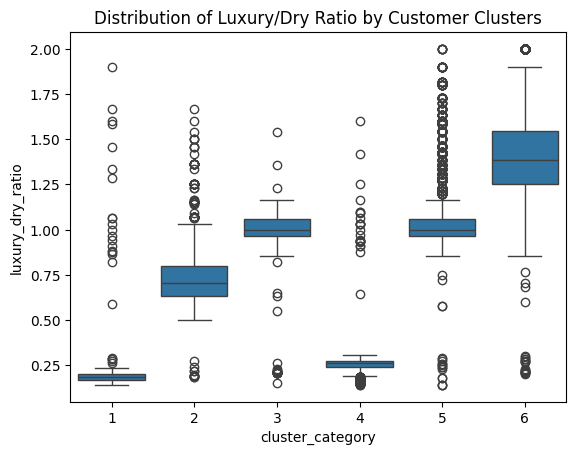

In [19]:
sns.boxplot(complete_df, x='cluster_category', y='luxury_dry_ratio',color='#1f77b4')
plt.title("Distribution of Luxury/Dry Ratio by Customer Clusters")

Text(0.5, 1.0, 'Distribution of Luxury/Fresh Ratio by Customer Clusters')

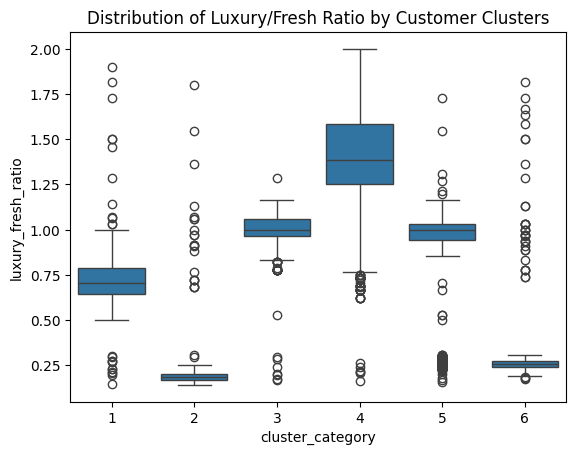

In [20]:
sns.boxplot(complete_df, x='cluster_category', y='luxury_fresh_ratio',color='#1f77b4')
plt.title("Distribution of Luxury/Fresh Ratio by Customer Clusters")

Text(0.5, 1.0, 'Distribution of Fresh/Dry Ratio by Customer Clusters')

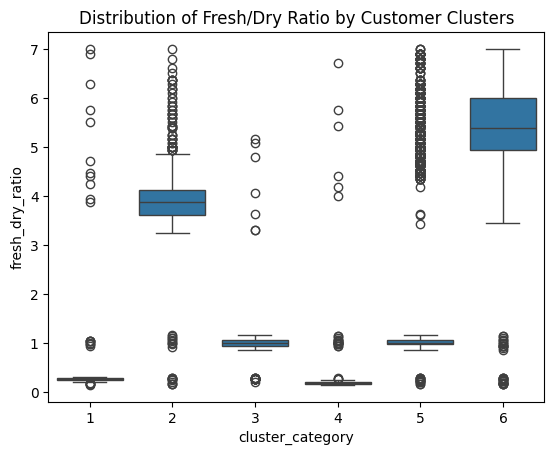

In [21]:
sns.boxplot(complete_df, x='cluster_category', y='fresh_dry_ratio',color='#1f77b4')
plt.title("Distribution of Fresh/Dry Ratio by Customer Clusters")

### Scatter plots for variation in sales by categories

These scatter plots highlight clear and distinct modes of classifying our clients based on their purchasing behaviours on different categories

Text(0.5, 1.0, 'Distribution of Fresh Sales and Dry Sales per Customer Category')

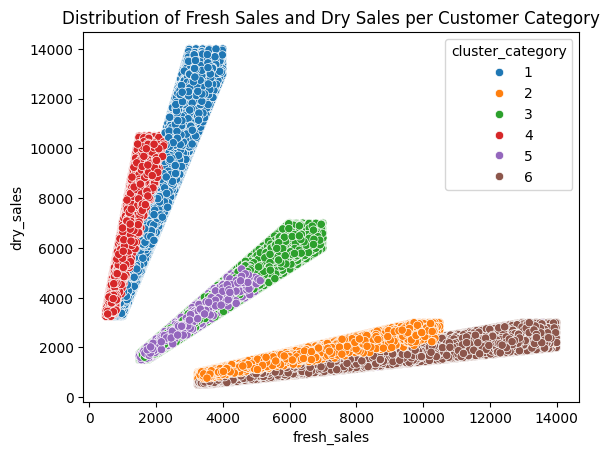

In [22]:
sns.scatterplot(complete_df, x='fresh_sales', y='dry_sales', hue='cluster_category', palette='tab10')
plt.title('Distribution of Fresh Sales and Dry Sales per Customer Category')

Compared to the other scatter plots below, this scatter plot can clearly show the presence of clusters behaving as pairs of two.
- Clusters `1` and `4` would only limit to small fresh item purchases - but may buy high amount of dry items
- Clusters `2` and `6` do not prefer much fresh items - but buy a lot from the fresh category
- Clusters `3` and `5` behaves moderately and lies in between the previous two. But it doesn't much on either category

Text(0.5, 1.0, 'Distribution of Luxury Sales and Dry Sales per Customer Category')

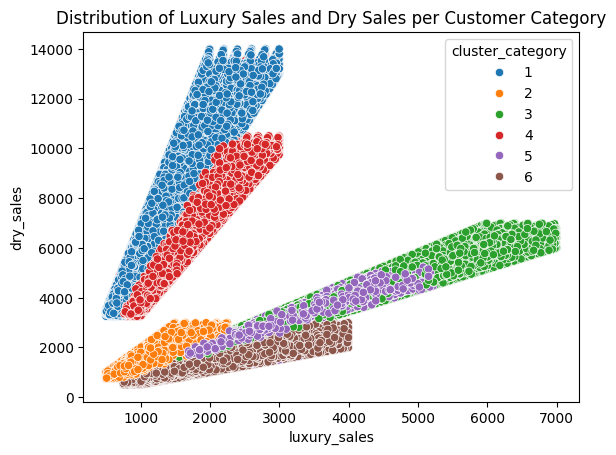

In [23]:
sns.scatterplot(complete_df, x='luxury_sales', y='dry_sales', hue='cluster_category', palette='tab10')
plt.title('Distribution of Luxury Sales and Dry Sales per Customer Category')

Text(0.5, 1.0, 'Distribution of Luxury Sales and Fresh Sales per Customer Category')

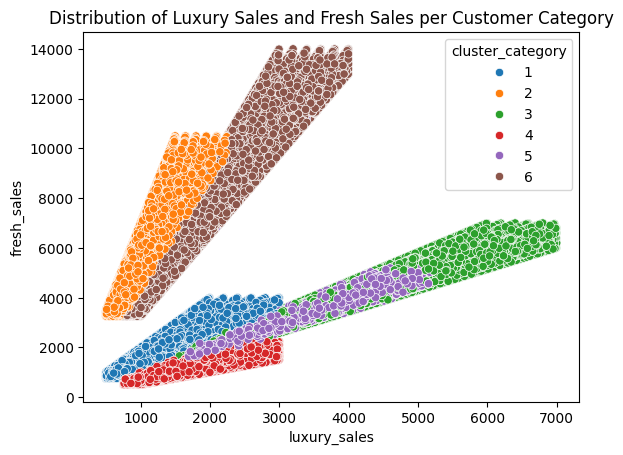

In [24]:
sns.scatterplot(complete_df, x='luxury_sales', y='fresh_sales', hue='cluster_category', palette='tab10')
plt.title('Distribution of Luxury Sales and Fresh Sales per Customer Category')

## Analysis with Sales Proportions

In [25]:
complete_df['luxury_%'] = complete_df['luxury_sales'] / complete_df['total_sales']
complete_df['dry_%'] = complete_df['dry_sales'] / complete_df['total_sales']
complete_df['fresh_%'] = complete_df['fresh_sales'] / complete_df['total_sales']

### Box plots for each category of sales

Most of these box plots confirm the insights we gained in the previous plots as well of how certain clusters prefer a particular category

Text(0.5, 1.0, 'Distribution of Proportion of Dry Sales  by Customer Clusters')

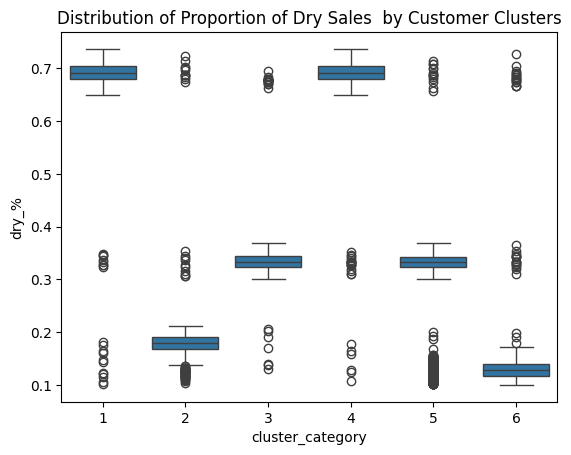

In [28]:
sns.boxplot(complete_df, x='cluster_category', y='dry_%')
plt.title("Distribution of Proportion of Dry Sales  by Customer Clusters")

Clusters `1` and `4` spend 70% of their purchases on Dry items.

Text(0.5, 1.0, 'Distribution of Proportion of Fresh Sales by Customer Clusters')

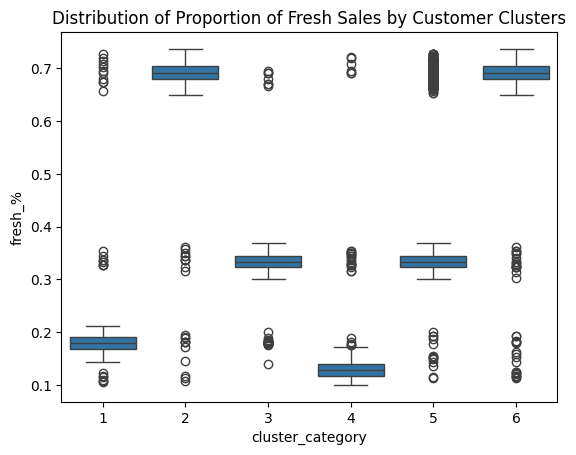

In [29]:
sns.boxplot(complete_df, x='cluster_category', y='fresh_%')
plt.title("Distribution of Proportion of Fresh Sales by Customer Clusters")

Clusters `2` and `6` spend as high as 70% on Fresh Items

Text(0.5, 1.0, 'Distribution of Proportion of Luxury Sales by Customer Clusters')

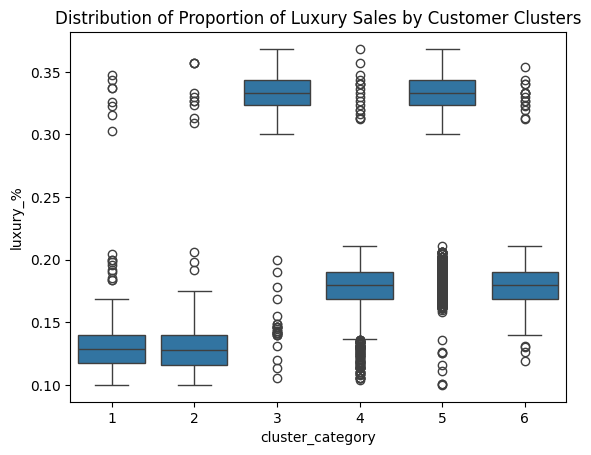

In [30]:
sns.boxplot(complete_df, x='cluster_category', y='luxury_%')
plt.title("Distribution of Proportion of Luxury Sales by Customer Clusters")

Even though it is a not a high proportion, Clusters `3` and `5` spend much more on Luxury items than other clusters

### Scatter plots analyzing distribution of categories of Sales

These scatter plots using the proportion of categories help see a strong picture in the classes allocation

Text(0.5, 1.0, 'Distribution of Luxury Sales and Fresh Sales per Customer Category')

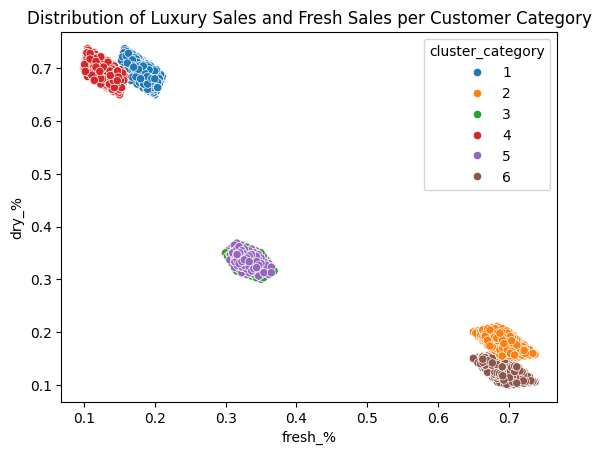

In [31]:
sns.scatterplot(complete_df, x='fresh_%', y='dry_%', hue='cluster_category', palette='tab10')
plt.title('Distribution of Luxury Sales and Fresh Sales per Customer Category')

Text(0.5, 1.0, 'Distribution of Luxury Sales and Dry Sales per Customer Category')

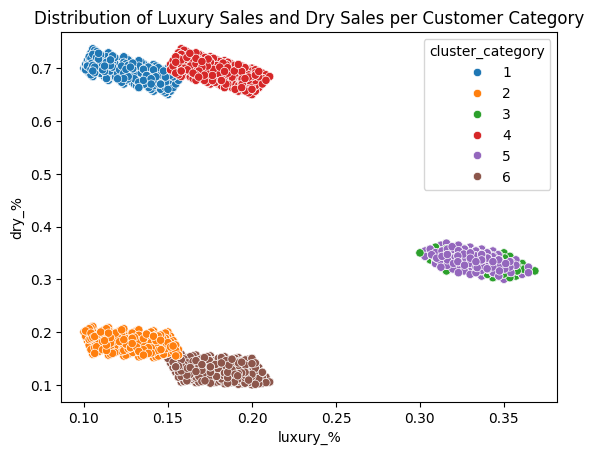

In [32]:
sns.scatterplot(complete_df, x='luxury_%', y='dry_%', hue='cluster_category', palette='tab10')
plt.title('Distribution of Luxury Sales and Dry Sales per Customer Category')

Text(0.5, 1.0, 'Distribution of Luxury Sales and Fresh Sales per Customer Category')

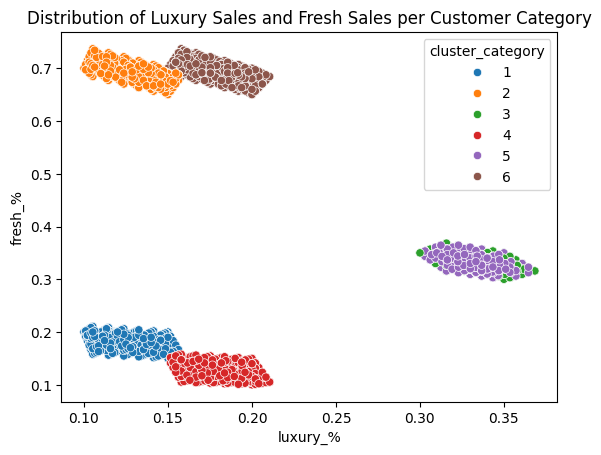

In [33]:
sns.scatterplot(complete_df, x='luxury_%', y='fresh_%', hue='cluster_category', palette='tab10')
plt.title('Distribution of Luxury Sales and Fresh Sales per Customer Category')

#### Analyzing based on city type

The city type was taken to check if there was a reason for the clusters acting as pairs.

And the plot confirms that from each pair, one was from `city_type=0` and other was from `city_type=1`

Text(0.5, 1.0, 'Distribution of Luxury Sales and Fresh Sales per Customer Category')

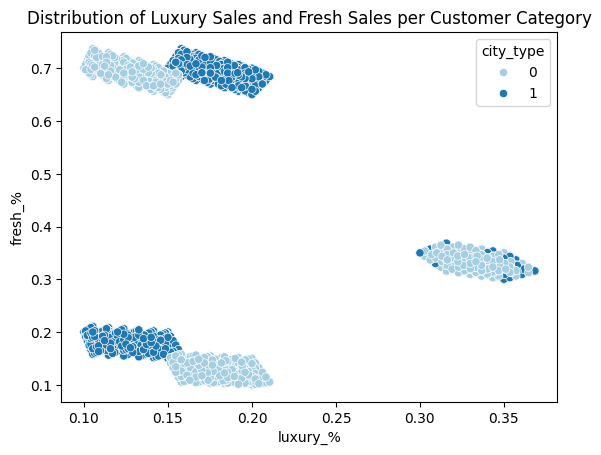

In [34]:
sns.scatterplot(complete_df, x='luxury_%', y='fresh_%', hue='city_type', palette='Paired')
plt.title('Distribution of Luxury Sales and Fresh Sales per Customer Category')

## Analyzing City Type Allocations

In [35]:
complete_df.groupby(['cluster_category'])['city_type'].value_counts().unstack(fill_value=0)

city_type,0,1
cluster_category,,
1,855,197889
2,163260,13
3,27,51454
4,181627,12
5,42156,17
6,37,177451


In [37]:
group2 = complete_df.groupby(['cluster_category'])['city_type'].value_counts(normalize=True).unstack().reset_index()
group2['most_preferred_item'] = ['Dry','Fresh','Luxury','Dry','Luxury','Fresh'] 
group2 = group2.set_index('cluster_category')
group2

city_type,0,1,most_preferred_item
cluster_category,,,
1,0.004302,0.995698,Dry
2,0.999920,0.000080,Fresh
3,0.000524,0.999476,Luxury
4,0.999934,0.000066,Dry
5,0.999597,0.000403,Luxury
6,0.000208,0.999792,Fresh


Text(0.5, 1.0, 'Clusters preferring\n Luxury Items')

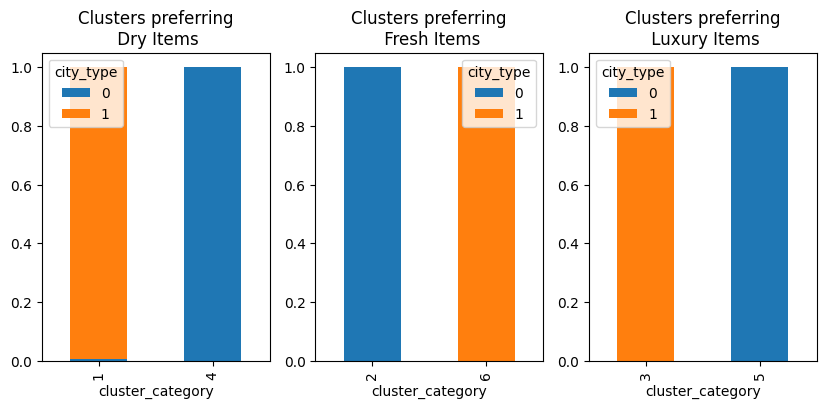

In [38]:
plt.figure(figsize=(10,4))
ax = plt.subplot(1,3,1)
group2.loc[group2['most_preferred_item']=='Dry'].plot(kind='bar',stacked=True, ax=ax)
plt.title('Clusters preferring\n Dry Items')

ax = plt.subplot(1,3,2)
group2.loc[group2['most_preferred_item']=='Fresh'].plot(kind='bar',stacked=True, ax=ax)
plt.title('Clusters preferring\n Fresh Items')


ax = plt.subplot(1,3,3)
group2.loc[group2['most_preferred_item']=='Luxury'].plot(kind='bar',stacked=True, ax=ax)
plt.title('Clusters preferring\n Luxury Items')


Clusters and their City Type
- `City_type=0` -- Cluster `4` , Cluster `2` , Cluster `5`
- `City_type=1` -- Cluster `1` , Cluster `6` , Cluster `3`